In [1]:
import pbjam as pb
from pbjam.jar import session
import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk 
import sys
import pandas as pd

In [2]:
kic = '4448777'
numax = [220.0, 3.0]
dnu = [16.97, 0.01]
teff = [4750, 100]

In [3]:
# Initialize a jam session with a single star:
jam_sess = session(ID = [kic], numax = [numax], dnu = [dnu], teff = [teff], kwargs = {'quarter': 5})

# with more than one star:
jam_sess = session(ID = [kic,kic], numax = [numax,numax], dnu = [dnu,dnu], teff = [teff,teff], kwargs = {'quarter': [5,5]})

# with own timeseries:
time,flux = np.genfromtxt('Examples/myts.asciifile').T
jam_sess = session(ID = [kic], numax = [numax], dnu = [dnu], teff = [teff], timeseries = [(time,flux)])

# in ascii format
jam_sess = session(ID = [kic], numax = [numax], dnu = [dnu], teff = [teff], timeseries = ['Examples/myts.asciifile'])

# in lightkurve format
lc = lk.search_lightcurvefile(target=kic, quarter=5, cadence = 'long').download().PDCSAP_FLUX
lc = lc.remove_nans().remove_outliers().flatten().normalize()
jam_sess = session(ID = [kic], numax = [numax], dnu = [dnu], teff = [teff], timeseries = [lc])

# with own powerspectrum:
freq, power = np.genfromtxt('Examples/mypsd.asciifile').T
jam_sess = session(ID = [kic], numax = [numax],dnu = [dnu], teff = [teff], psd = [(freq, power)])

# in ascii format:
jam_sess = session(ID = [kic], numax = [numax], dnu = [dnu], teff = [teff], psd = ['Examples/mypsd.asciifile'])

# in lightkurve format
time, flux = np.array(lc.time), np.array(lc.flux)
pg = lk.LightCurve(time, flux).to_periodogram(normalization='psd').flatten()
jam_sess = session(ID = [kic], numax = [numax], dnu = [dnu], teff = [teff], psd = [pg])

# from dataframe or other dictlike structure
df = pd.read_csv('Examples/mytgts.csv')
jam_sess = session(dictlike = df)

In [4]:
# Result is always a list of star class instances
# Taking the first one as an example
star = jam_sess.stars[0]

In [5]:
# Do mode ID for one of the stars using the asymptotic method on 7 radial orders
star.asymptotic_modeid(norders = 7)

Burningham
Sampling


In [6]:
# Result is a dataframe
print(star.mode_ID)

    ell       nu_mu    nu_std
0     2  157.544488  0.388296
1     0  159.760392  0.388489
2     2  174.103441  0.328060
3     0  176.319490  0.324293
4     2  190.800784  0.308057
5     0  193.014906  0.301597
6     2  207.632495  0.303692
7     0  209.847775  0.296538
8     2  224.597041  0.301314
9     0  226.810750  0.295410
10    2  241.689368  0.305478
11    0  243.905111  0.302803
12    2  258.911758  0.337776
13    0  261.129917  0.339835


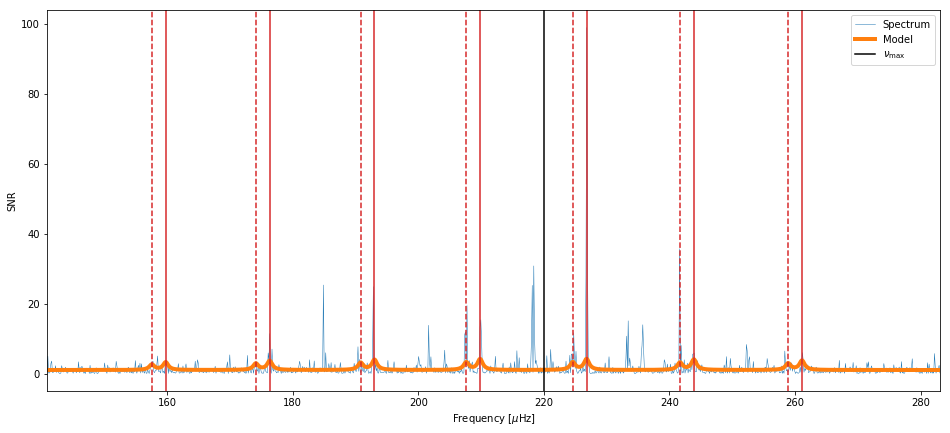

In [7]:
# Plot resulting spectrum model
mod_f, mod_s = star.asy_model

fig, ax = plt.subplots(figsize = (16,7))
ax.set_xlim(min(mod_f), max(mod_f))
#ax.set_ylim(0, 10)
ax.plot(star.f, star.s, lw = 0.5, label = 'Spectrum')
ax.plot(mod_f, mod_s, label = 'Model', lw = 4)
ax.set_xlabel('Frequency [$\mu$Hz]')
ax.set_ylabel('SNR')
for i in range(len(star.mode_ID)):
    if star.mode_ID['ell'][i] == 0:
        ls = '-'
    else:
        ls = '--'
    ax.axvline(star.mode_ID['nu_mu'][i], color = 'C3', ls = ls)
ax.axvline(numax[0], color = 'k', label = r'$\nu_{\mathrm{max}}$')
ax.legend()